# Importing required packages:

In [205]:

import pandas as pd
import numpy as np
import math as math
import keras
import seaborn as sns
sns.set(style='whitegrid')
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (15, 6)

# Exploratory Data Analysis:

In [206]:
users_df = pd.read_csv(r'C:\zee-users.dat', sep='::', engine='python')
users_df

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [207]:


# Load movies data with correct file path, separator, and encoding
movies_df = pd.read_csv(r'C:\zee-movies.dat', sep='::', engine='python', encoding='ISO-8859-1')


movies_df.head()


,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [208]:
ratings_df = pd.read_csv(r'C:\zee-ratings.dat', sep='::', engine='python',encoding='ISO-8859-1')
ratings_df

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [209]:

ratings_df = pd.read_csv(r'C:\zee-ratings.dat', sep='::', engine='python',encoding='ISO-8859-1')
movies_df = pd.read_csv(r'C:\zee-movies.dat', sep='::', engine='python', encoding='ISO-8859-1')
users_df = pd.read_csv(r'C:\zee-users.dat', sep='::', engine='python')
# Merge users and ratings DataFrames
# Rename the 'Movie ID' column in movies_df to 'MovieID'
movies_df.rename(columns={'Movie ID': 'MovieID'}, inplace=True)

# Merge ratings_df and movies_df based on the 'MovieID' column



In [210]:
df = pd.merge(pd.merge(movies_df,ratings_df,left_on = 'MovieID',right_on='MovieID',how='inner'),users_df,on='UserID',how='inner')

In [211]:
df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [212]:
df['Age'] = df['Age'].astype('int32')
df['Rating'] = df['Rating'].astype('int32')
df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='s')

In [213]:
df['ReleaseYear'] = df['Title'].str.rsplit(" ",1).str[1].str.lstrip("(").str.rstrip(")")

In [214]:
df.replace({'Age':{1: "Under 18",
                   18: "18-24",
                   25: "25-34",
                   35: "35-44",
                   45: "45-49",
                   50: "50-55",
                   56: "56+"}},inplace=True)

In [215]:
df.replace({'Occupation':{'0': "other" or not specified,
                          '1': "academic/educator",
                          '2': "artist",
                          '3': "clerical/admin",
                          '4': "college/grad student",
                          '5': "customer service",
                          '6': "doctor/health care",
                          '7': "executive/managerial",
                          '8': "farmer",
                          '9': "homemaker",
                          '10': "K-12 student",
                          '11': "lawyer",
                          '12': "programmer",
                          '13': "retired",
                          '14': "sales/marketing",
                          '15': "scientist",
                          '16': "self-employed",
                          '17': "technician/engineer",
                          '18': "tradesman/craftsman",
                          '19': "unemployed",
                          '20': "writer"

}},inplace=True)

In [216]:
df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,ReleaseYear
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,2001-01-06 23:37:48,F,Under 18,10,48067,1995
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,2001-01-06 23:39:11,F,Under 18,10,48067,1995
2,150,Apollo 13 (1995),Drama,1,5,2000-12-31 22:29:37,F,Under 18,10,48067,1995
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,2000-12-31 22:12:40,F,Under 18,10,48067,1977
4,527,Schindler's List (1993),Drama|War,1,5,2001-01-06 23:36:35,F,Under 18,10,48067,1993
...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,2000-05-16 15:12:50,M,25-34,4,92843,2000
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,2000-05-16 15:12:50,M,25-34,4,92843,2000
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,2000-05-16 15:11:42,M,25-34,4,92843,2000
1000207,3555,U-571 (2000),Action|Thriller,5727,3,2000-05-16 15:24:59,M,25-34,4,92843,2000


In [217]:
df['ReleaseYear'].unique()

array(['1995', '1977', '1993', '1992', '1937', '1991', '1996', '1964',
       '1939', '1958', '1950', '1941', '1965', '1982', '1975', '1987',
       '1962', '1989', '1985', '1959', '1997', '1998', '1988', '1942',
       '1947', '1999', '1980', '1983', '1986', '1990', '2000', '1994',
       '1978', '1961', '1984', '1972', '1976', '1981', '1973', '1974',
       '1940', '1963', '1952', '1954', '1953', '1944', '1968', '1957',
       '1946', '1949', '1951', '1971', '1979', '1967', '1966', '1948',
       '1933', '1970', '1969', '1930', '1955', '1956', '1934', '1920',
       '1925', '1938', '1960', '1935', '1932', '1931', '1945', '1943',
       '1936', '1929', '1926', '1927', '1922', '1919', '1921', '1923',
       '1928'], dtype=object)

In [218]:
df['ReleaseYear'].nunique()

81

In [219]:
df['ReleaseYear'].replace(['1981):','1964):','1989):','1995):'],['1981','1964','1989','1995'],inplace=True)

In [220]:
idx_val = df[(df['ReleaseYear'] == 'prendront') | 
   (df['ReleaseYear'] == 'Polar')|
   (df['ReleaseYear'] == 'Bo')|
   (df['ReleaseYear'] == 'Arta')|
   (df['ReleaseYear'] == 'B')|
   (df['ReleaseYear'] == "d'A")|
   (df['ReleaseYear'] == '19')|
   (df['ReleaseYear'] == '')|
   (df['ReleaseYear'] == 'the')|
   (df['ReleaseYear'] == '195')].index
df.drop(index=idx_val,inplace=True)

In [221]:
df['Title'] = df['Title'].str.rsplit(' ',1).str[0]

In [222]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,ReleaseYear
0,1,Toy Story,Animation|Children's|Comedy,1,5,2001-01-06 23:37:48,F,Under 18,10,48067,1995
1,48,Pocahontas,Animation|Children's|Musical|Romance,1,5,2001-01-06 23:39:11,F,Under 18,10,48067,1995
2,150,Apollo 13,Drama,1,5,2000-12-31 22:29:37,F,Under 18,10,48067,1995
3,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,1,4,2000-12-31 22:12:40,F,Under 18,10,48067,1977
4,527,Schindler's List,Drama|War,1,5,2001-01-06 23:36:35,F,Under 18,10,48067,1993


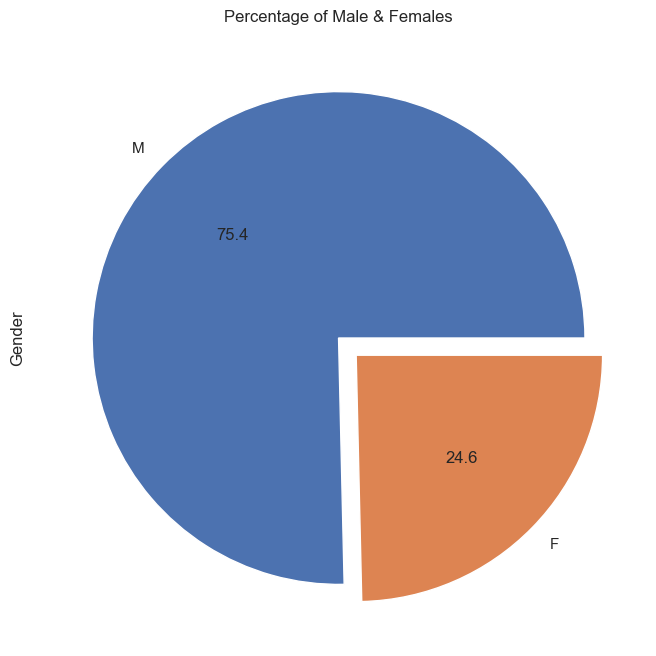

In [223]:
df['Gender'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.1f',explode=[0,0.1])
plt.title('Percentage of Male & Females')
plt.show()

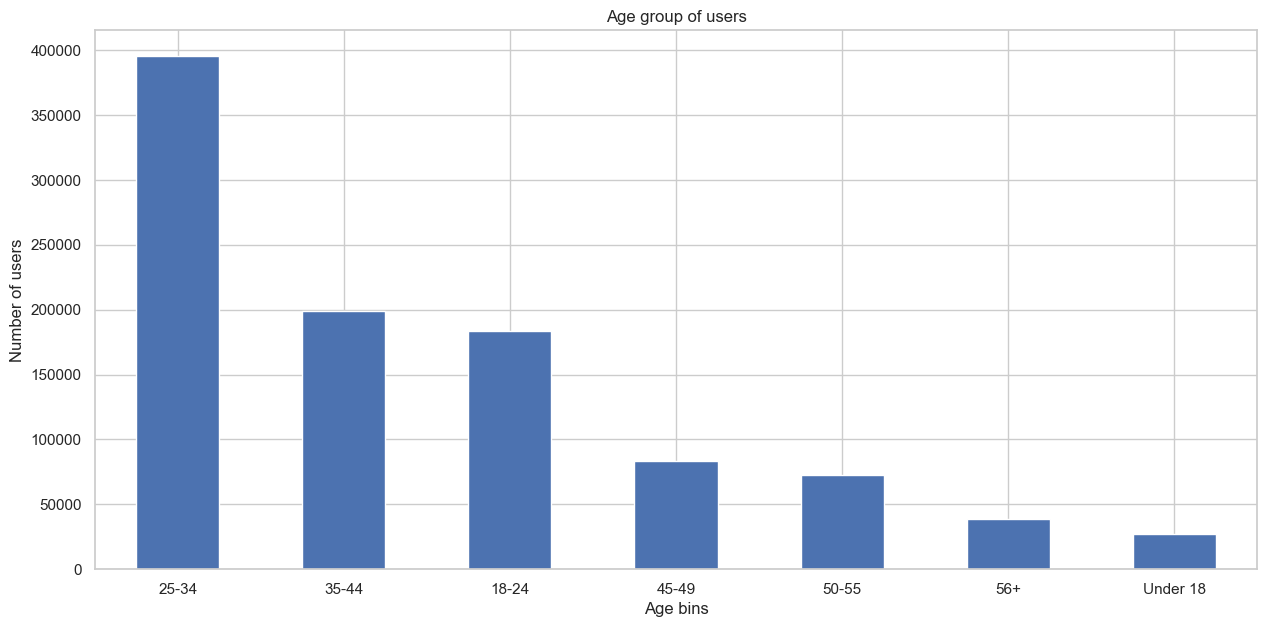

In [224]:
df['Age'].value_counts().plot(kind='bar',figsize=(15,7))
plt.title('Age group of users')
plt.xlabel('Age bins')
plt.xticks(rotation = 360)
plt.ylabel('Number of users')
plt.show()

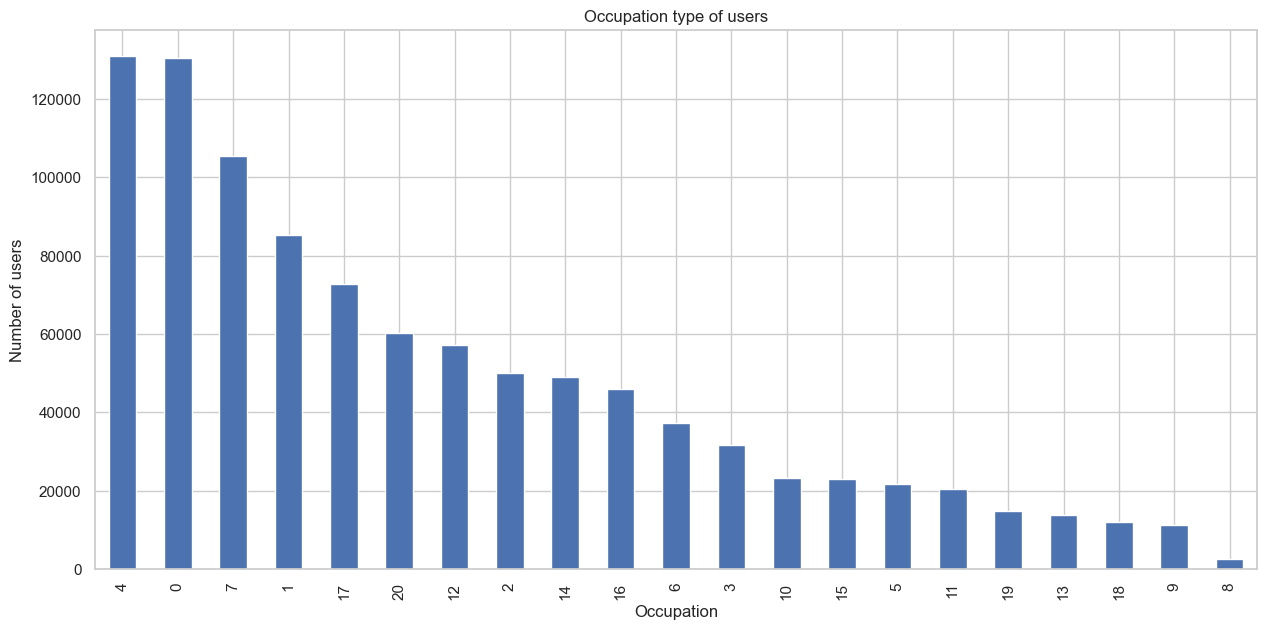

In [225]:
df['Occupation'].value_counts().plot(kind='bar',figsize=(15,7))
plt.title('Occupation type of users')
plt.xlabel('Occupation')
# plt.xticks(rotation = 45)
plt.ylabel('Number of users')
plt.show()

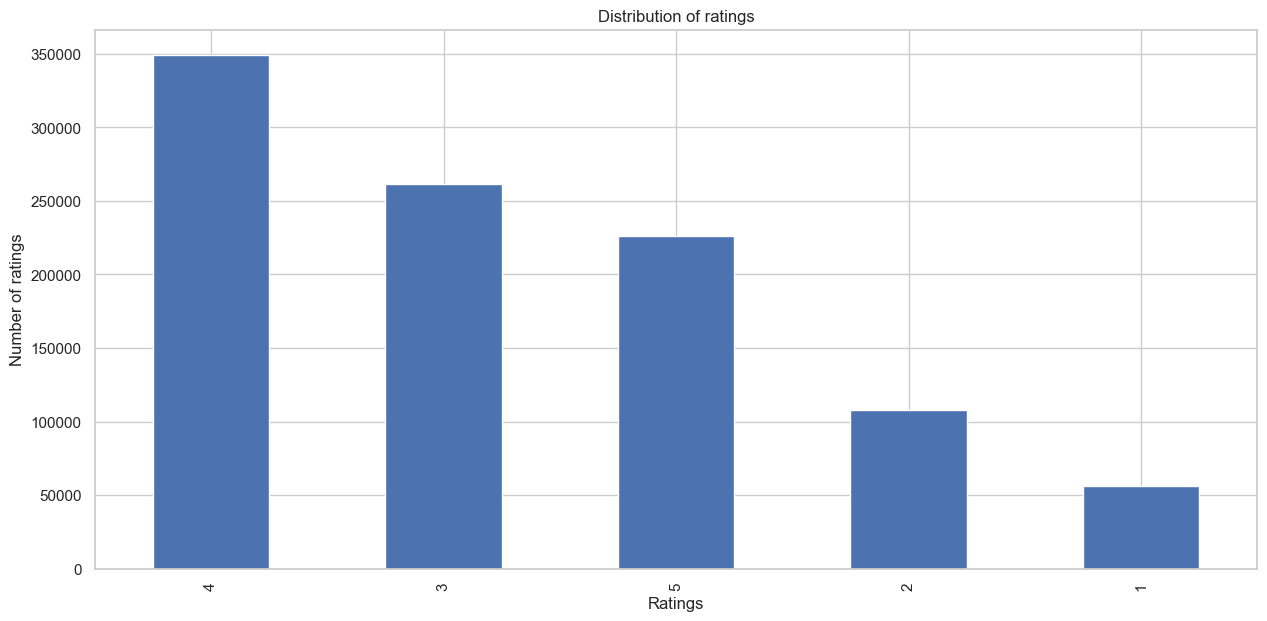

In [226]:
df['Rating'].value_counts().plot(kind='bar',figsize=(15,7))
plt.title("Distribution of ratings")
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.show()

In [227]:
# Grouping the data in terms of Average Rating and No. of Ratings given

df.groupby('Title')['Rating'].mean().sort_values(ascending=False).to_frame().reset_index().rename(columns={'Rating':'Average Rating'})

,Title,Average Rating
0,Smashing Time,5.0
1,Song of Freedom,5.0
2,One Little Indian,5.0
3,Ulysses (Ulisse),5.0
4,"Baby, The",5.0
...,...,...
3659,"Bloody Child, The",1.0
3660,Wirey Spindell,1.0
3661,Spring Fever USA (a.k.a. Lauderdale),1.0
3662,"McCullochs, The",1.0


In [228]:
df.groupby('Title')['Rating'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'Rating':'Count'})

,Title,Count
0,American Beauty,3428
1,Star Wars: Episode IV - A New Hope,2991
2,Star Wars: Episode V - The Empire Strikes Back,2990
3,Star Wars: Episode VI - Return of the Jedi,2883
4,Jurassic Park,2672
...,...,...
3659,"Uninvited Guest, An",1
3660,Detroit 9000,1
3661,Roula,1
3662,An Unforgettable Summer,1


In [229]:
df_2 = pd.merge(df.groupby('Title')['Rating'].mean().sort_values(ascending=False).to_frame().reset_index().rename(columns={'Rating':'Average Rating'}),df.groupby('Title')['Rating'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'Rating':'Count'}),on='Title')
df_2.head()

,Title,Average Rating,Count
0,Smashing Time,5.0,2
1,Song of Freedom,5.0,1
2,One Little Indian,5.0,1
3,Ulysses (Ulisse),5.0,1
4,"Baby, The",5.0,1


# Top 5 Rating-wise movies:

In [230]:
df_2[df_2['Count'] > 125].sort_values(by=['Average Rating'],ascending=False).head(5)

,Title,Average Rating,Count
14,Seven Samurai (The Magnificent Seven) (Shichin...,4.560510,628
15,"Shawshank Redemption, The",4.554558,2227
16,"Godfather, The",4.524966,2223
17,"Close Shave, A",4.520548,657
18,"Usual Suspects, The",4.517106,1783


# Building a Recommender System based on Pearson Correlation
Creating a pivot table of movie titles & user id and imputing the NaN values

In [231]:
# pivot table

tab = pd.pivot_table(df,index='UserID',columns='Title',values='Rating',aggfunc='mean')
tab.head()

Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior, The",...,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Young and Innocent,Your Friends and Neighbors,Zachariah,"Zed & Two Noughts, A",Zero Effect,Zero Kelvin (Kjærlighetens kjøtere),Zeus and Roxanne,eXistenZ
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
tab.fillna(0,inplace=True)

In [233]:
tab.shape

(6040, 3664)

In [234]:
# Creating a csr based decomposition/conversion of sparse matrix

from scipy.sparse import csr_matrix
csr_mat = csr_matrix(tab.T.values)

# KNN based Recommender System:

In [235]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors= 5,metric = 'cosine', n_jobs=-1)
knn.fit(csr_mat)

NearestNeighbors(metric='cosine', n_jobs=-1)

In [236]:
# 6. Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.
movie_name = 'Liar Liar'
distances, indices = knn.kneighbors(tab[movie_name].values.reshape(1,-1),n_neighbors=4)
for i in range (0, len(distances.flatten())):
  if i == 0 :
    print("The movies close similar to",movie_name,"are \n")
  else:
    print(tab.columns[indices.flatten()[i]],"with a distance of",round(distances.flatten()[i],3))

The movies close similar to Liar Liar are 

Mrs. Doubtfire with a distance of 0.443
Ace Ventura: Pet Detective with a distance of 0.483
Dumb & Dumber with a distance of 0.487


# Building a Recommender System based on Matrix Factorization¶

In [237]:
users = df.UserID.unique()
movies = df.MovieID.unique()

In [238]:
userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

In [239]:
df['UserID'] = df['UserID'].apply(lambda x : userid2idx[x])
df['MovieID'] = df['MovieID'].apply(lambda x : movieid2idx[x])

In [240]:
train = df[np.random.rand(len(df)) < 0.8]
valid = df[~(np.random.rand(len(df)) < 0.8)]
print(train.shape,valid.shape)

(799549, 11) (199804, 11)


In [241]:
n_movies = len(df['MovieID'].unique())
n_users = len(df['UserID'].unique())
n_latent_factors = 64 # Hyperparameter or hidden model factors  

In [242]:
# Creating embedding vector for user using embedding layer from Keras

import tensorflow as tf
user_input = tf.keras.Input(shape=(1,) ,name='user_input', dtype='int64')
user_embedding = tf.keras.layers.Embedding(n_users,n_latent_factors, name='user_embedding')(user_input)
user_vec = tf.keras.layers.Flatten(name='FlattenUsers')(user_embedding)

In [243]:
# Creating embedding vector for movie using embedding layer from Keras

movie_input = tf.keras.Input(shape=(1,) ,name='movie_input', dtype='int64')
movie_embedding = tf.keras.layers.Embedding(n_users,n_latent_factors, name='movie_embedding')(movie_input)
movie_vec = tf.keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

In [244]:
from keras.layers import Dot
import keras

# Assuming you already have user_vec, movie_vec, user_input, and movie_input defined

sim = Dot(axes=1)([user_vec, movie_vec])
model = keras.models.Model([user_input, movie_input], sim)


In [245]:
from tensorflow.keras.optimizers import Adam

# Assuming you have already defined and compiled your model

model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')


In [246]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ movie_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 64)     │    386,560 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ movie_embedding     │ (None, 1, 64)     │    386,560 │ movie_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FlattenUsers        │ (None, 64)        │          0 │ user_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FlattenMovies       │ (None, 64)        │          0 │ movie_embedding[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_2 (Dot)         │ (None, 1)         │          0 │ FlattenUsers[0][… │
│                     │                   │            │ FlattenMovies[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 773,120 (2.95 MB)

 Trainable params: 773,120 (2.95 MB)

 Non-trainable params: 0 (0.00 B)

In [249]:

# RMSE

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(valid.Rating, y_pred, squared = False)
print(f"RMSE : {rmse}")

RMSE : 3.7520290380557646


In [250]:
# Model Evaluation:

y_pred = model.predict([valid.UserID, valid.MovieID], verbose  =0)
y_pred_class  =np.argmax(y_pred, axis  =1)

In [251]:
# MAPE

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(valid.Rating, y_pred)
print(f"MAPE : {mape}")

MAPE : 1.000003599872796


In [254]:
# Check the structure and characteristics of the dataset
ratings_df.info

<bound method DataFrame.info of          UserID  MovieID  Rating  Timestamp
0             1     1193       5  978300760
1             1      661       3  978302109
2             1      914       3  978301968
3             1     3408       4  978300275
4             1     2355       5  978824291
...         ...      ...     ...        ...
1000204    6040     1091       1  956716541
1000205    6040     1094       5  956704887
1000206    6040      562       5  956704746
1000207    6040     1096       4  956715648
1000208    6040     1097       4  956715569

[1000209 rows x 4 columns]>

In [255]:
users_df.info

<bound method DataFrame.info of       UserID Gender  Age  Occupation Zip-code
0          1      F    1          10    48067
1          2      M   56          16    70072
2          3      M   25          15    55117
3          4      M   45           7    02460
4          5      M   25          20    55455
...      ...    ...  ...         ...      ...
6035    6036      F   25          15    32603
6036    6037      F   45           1    76006
6037    6038      F   56           1    14706
6038    6039      F   45           0    01060
6039    6040      M   25           6    11106

[6040 rows x 5 columns]>

In [256]:
movies_df.info

<bound method DataFrame.info of       MovieID                               Title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3878     3948             Meet the Parents (2000)   
3879     3949          Requiem for a Dream (2000)   
3880     3950                    Tigerland (2000)   
3881     3951             Two Family House (2000)   
3882     3952               Contender, The (2000)   

                            Genres  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  
3                     Comedy|Drama  
4                           Comedy  
...                            ...  
3878                        Comedy  
3879                         Drama 

In [257]:
# Check for missing values
print("\nMissing values in ratings_df:")
print(ratings_df.isnull().sum())



Missing values in ratings_df:
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


In [258]:
print("\nMissing values in users_df:")
print(users_df.isnull().sum())



Missing values in users_df:
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


In [259]:
print("\nMissing values in movies_df:")
print(movies_df.isnull().sum())



Missing values in movies_df:
MovieID    0
Title      0
Genres     0
dtype: int64


In [260]:
# Check summary statistics
print("\nSummary statistics for ratings_df:")
print(ratings_df.describe())


Summary statistics for ratings_df:
             UserID       MovieID        Rating     Timestamp
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  9.722437e+08
std    1.728413e+03  1.096041e+03  1.117102e+00  1.215256e+07
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08
25%    1.506000e+03  1.030000e+03  3.000000e+00  9.653026e+08
50%    3.070000e+03  1.835000e+03  4.000000e+00  9.730180e+08
75%    4.476000e+03  2.770000e+03  4.000000e+00  9.752209e+08
max    6.040000e+03  3.952000e+03  5.000000e+00  1.046455e+09


In [261]:
print("\nSummary statistics for users_df:")
print(users_df.describe())


Summary statistics for users_df:
            UserID          Age   Occupation
count  6040.000000  6040.000000  6040.000000
mean   3020.500000    30.639238     8.146854
std    1743.742145    12.895962     6.329511
min       1.000000     1.000000     0.000000
25%    1510.750000    25.000000     3.000000
50%    3020.500000    25.000000     7.000000
75%    4530.250000    35.000000    14.000000
max    6040.000000    56.000000    20.000000


In [262]:
print("\nSummary statistics for movies_df:")
print(movies_df.describe())


Summary statistics for movies_df:
           MovieID
count  3883.000000
mean   1986.049446
std    1146.778349
min       1.000000
25%     982.500000
50%    2010.000000
75%    2980.500000
max    3952.000000


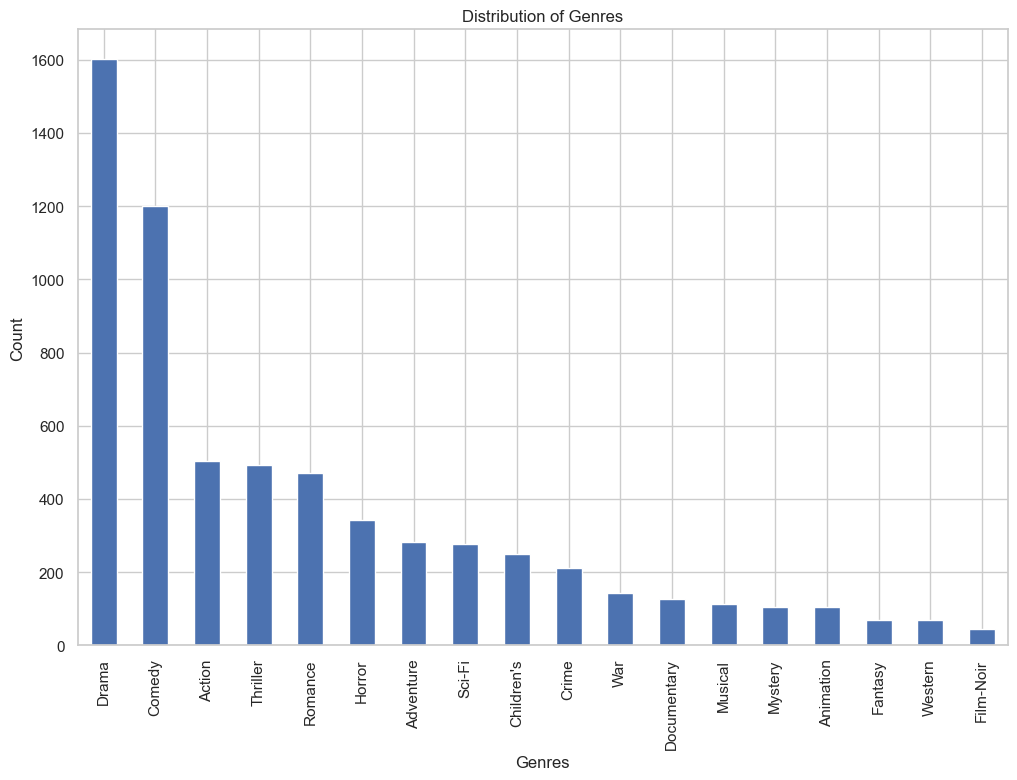

In [263]:
# Distribution of Genres
genres_list = '|'.join(movies_df['Genres']).split('|')
genres_count = pd.Series(genres_list).value_counts()
plt.figure(figsize=(12, 8))
genres_count.plot(kind='bar')
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()


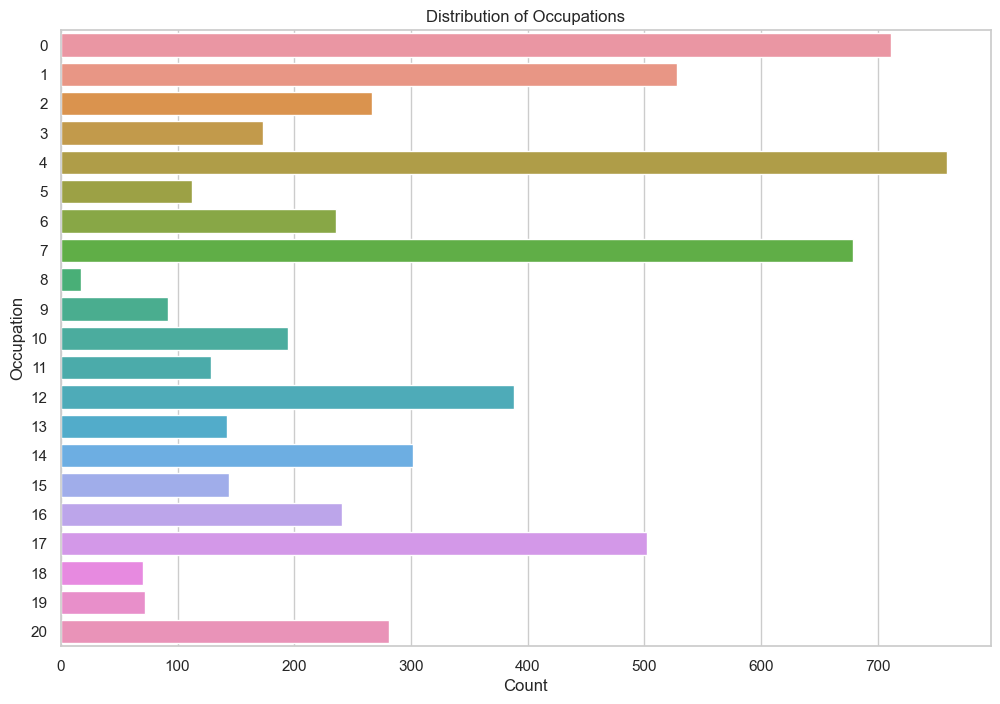

In [264]:

# Distribution of Occupations
plt.figure(figsize=(12, 8))
sns.countplot(y='Occupation', data=users_df)
plt.title('Distribution of Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()


In [265]:


# Convert timestamp to datetime
ratings_df['Timestamp'] = pd.to_datetime(ratings_df['Timestamp'], unit='s')

# Extract release year from movie titles
movies_df['Release_Year'] = movies_df['Title'].str.extract(r'\((\d{4})\)')

# Convert release year to numeric type
movies_df['Release_Year'] = pd.to_numeric(movies_df['Release_Year'], errors='coerce')

# Display first few rows to verify the changes
print("First few rows of ratings_df:")
print(ratings_df.head())

print("\nFirst few rows of movies_df with Release_Year:")
print(movies_df.head())


First few rows of ratings_df:
   UserID  MovieID  Rating           Timestamp
0       1     1193       5 2000-12-31 22:12:40
1       1      661       3 2000-12-31 22:35:09
2       1      914       3 2000-12-31 22:32:48
3       1     3408       4 2000-12-31 22:04:35
4       1     2355       5 2001-01-06 23:38:11

First few rows of movies_df with Release_Year:
   MovieID                               Title                        Genres  \
0        1                    Toy Story (1995)   Animation|Children's|Comedy   
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2        3             Grumpier Old Men (1995)                Comedy|Romance   
3        4            Waiting to Exhale (1995)                  Comedy|Drama   
4        5  Father of the Bride Part II (1995)                        Comedy   

   Release_Year  
0          1995  
1          1995  
2          1995  
3          1995  
4          1995  


In [266]:
# Grouping by MovieID to calculate average rating and count of ratings
movie_stats = ratings_df.groupby('MovieID').agg({'Rating': ['mean', 'count']})

# Resetting column names for clarity
movie_stats.columns = ['Average_Rating', 'Number_of_Ratings']

# Merging with movies_df to include movie titles
movie_stats = movie_stats.merge(movies_df[['MovieID', 'Title']], on='MovieID', how='left')

# Sorting by average rating and number of ratings
movie_stats = movie_stats.sort_values(by=['Average_Rating', 'Number_of_Ratings'], ascending=False)

# Displaying the first few rows of movie_stats
print(movie_stats.head())


      MovieID  Average_Rating  Number_of_Ratings  \
744       787             5.0                  3   
3010     3233             5.0                  2   
926       989             5.0                  1   
1652     1830             5.0                  1   
2955     3172             5.0                  1   

                                          Title  
744          Gate of Heavenly Peace, The (1995)  
3010                       Smashing Time (1967)  
926   Schlafes Bruder (Brother of Sleep) (1995)  
1652                    Follow the Bitch (1998)  
2955                    Ulysses (Ulisse) (1954)  


In [267]:
# Create pivot table with movie titles as columns and user IDs as index
pivot_table = ratings_df.pivot_table(index='UserID', columns='MovieID', values='Rating')

# Fill NaN values with a suitable value, such as the mean rating across all movies
pivot_table_filled = pivot_table.fillna(pivot_table.mean().mean())

# Display the first few rows of the filled pivot table
print(pivot_table_filled.head())


MovieID      1         2         3         4         5         6         7     \
UserID                                                                          
1        5.000000  3.238892  3.238892  3.238892  3.238892  3.238892  3.238892   
2        3.238892  3.238892  3.238892  3.238892  3.238892  3.238892  3.238892   
3        3.238892  3.238892  3.238892  3.238892  3.238892  3.238892  3.238892   
4        3.238892  3.238892  3.238892  3.238892  3.238892  3.238892  3.238892   
5        3.238892  3.238892  3.238892  3.238892  3.238892  2.000000  3.238892   

MovieID      8         9         10    ...      3943      3944      3945  \
UserID                                 ...                                 
1        3.238892  3.238892  3.238892  ...  3.238892  3.238892  3.238892   
2        3.238892  3.238892  3.238892  ...  3.238892  3.238892  3.238892   
3        3.238892  3.238892  3.238892  ...  3.238892  3.238892  3.238892   
4        3.238892  3.238892  3.238892  ...  3.238892

In [268]:
merged_df['ReleaseYear'] = merged_df['Title'].str.extract(r'\((\d{4})\)')

# Remove release year from title
merged_df['Title'] = merged_df['Title'].str.replace(r'\(\d{4}\)', '').str.strip()

In [269]:
merged_df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,ReleaseYear
0,1,Toy Story,Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,NaN
1,48,Pocahontas,Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,NaN
2,150,Apollo 13,Drama,1,5,978301777,F,1,10,48067,NaN
3,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,NaN
4,527,Schindler's List,Drama|War,1,5,978824195,F,1,10,48067,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement,Drama|Thriller,5727,4,958489970,M,25,4,92843,NaN
1000205,3535,American Psycho,Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,NaN
1000206,3536,Keeping the Faith,Comedy|Romance,5727,5,958489902,M,25,4,92843,NaN
1000207,3555,U-571,Action|Thriller,5727,3,958490699,M,25,4,92843,NaN


In [270]:
import pandas as pd
import numpy as np

# Assuming you have loaded the dataset into a DataFrame named merged_df
# Example: merged_df = pd.read_csv('your_dataset.csv')

# Define a function to recommend similar movies based on Pearson Correlation
def recommend_similar_movies(movie_title, df, num_recommendations=5):
    try:
        # Find the MovieID for the given movie title
        movie_id = df[df['Title'] == movie_title]['MovieID'].values[0]
    except IndexError:
        print("Movie not found.")
        return None
    
    # Pivot the DataFrame to create a user-movie rating matrix
    pivot_table = pd.pivot_table(df, values='Rating', index='UserID', columns='MovieID', fill_value=0)
    
    # Get ratings for the target movie
    target_movie_ratings = pivot_table[movie_id]
    
    # Calculate Pearson Correlation between the target movie and all other movies
    similar_scores = pivot_table.corrwith(target_movie_ratings, method='pearson')
    
    # Drop NaN values and sort the scores in descending order
    similar_scores.dropna(inplace=True)
    similar_scores = similar_scores.sort_values(ascending=False)
    
    # Exclude the target movie itself from recommendations
    similar_scores = similar_scores.drop(movie_id)
    
    # Get top N similar movies
    similar_movies = similar_scores.head(num_recommendations)
    
    return similar_movies.index


# Get input from the user
input_movie_title = input("Enter the movie title: ")

# Call the function to recommend similar movies
similar_movies = recommend_similar_movies(input_movie_title, merged_df)

# Check if similar_movies is None
if similar_movies is not None:
    # Display the recommended similar movies
    print("Recommended similar movies for", input_movie_title, ":")
    for idx, movie_id in enumerate(similar_movies, start=1):
        title = merged_df[merged_df['MovieID'] == movie_id]['Title'].values[0]
        print(idx, ".", title)


Enter the movie title: 
Movie not found.


In [271]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute item-item similarity matrix
item_similarity_matrix = cosine_similarity(pivot_table_filled.T)

# Compute user-user similarity matrix
user_similarity_matrix = cosine_similarity(pivot_table_filled)

# Print item-item similarity matrix
print("Item-Item Similarity Matrix:")
print(item_similarity_matrix)

# Print user-user similarity matrix
print("\nUser-User Similarity Matrix:")
print(user_similarity_matrix)


Item-Item Similarity Matrix:
[[1.         0.97895154 0.97894478 ... 0.98279882 0.98275514 0.98035893]
 [0.97895154 1.         0.99054857 ... 0.99408945 0.99417676 0.99117028]
 [0.97894478 0.99054857 1.         ... 0.99498963 0.99503086 0.99209124]
 ...
 [0.98279882 0.99408945 0.99498963 ... 1.         0.99908365 0.9962981 ]
 [0.98275514 0.99417676 0.99503086 ... 0.99908365 1.         0.99642386]
 [0.98035893 0.99117028 0.99209124 ... 0.9962981  0.99642386 1.        ]]

User-User Similarity Matrix:
[[1.         0.99731945 0.99830113 ... 0.99871111 0.99782729 0.99300093]
 [0.99731945 1.         0.99730891 ... 0.99767115 0.99671816 0.99186041]
 [0.99830113 0.99730891 1.         ... 0.99884626 0.99777628 0.99263021]
 ...
 [0.99871111 0.99767115 0.99884626 ... 1.         0.99836265 0.99311846]
 [0.99782729 0.99671816 0.99777628 ... 0.99836265 1.         0.99307445]
 [0.99300093 0.99186041 0.99263021 ... 0.99311846 0.99307445 1.        ]]


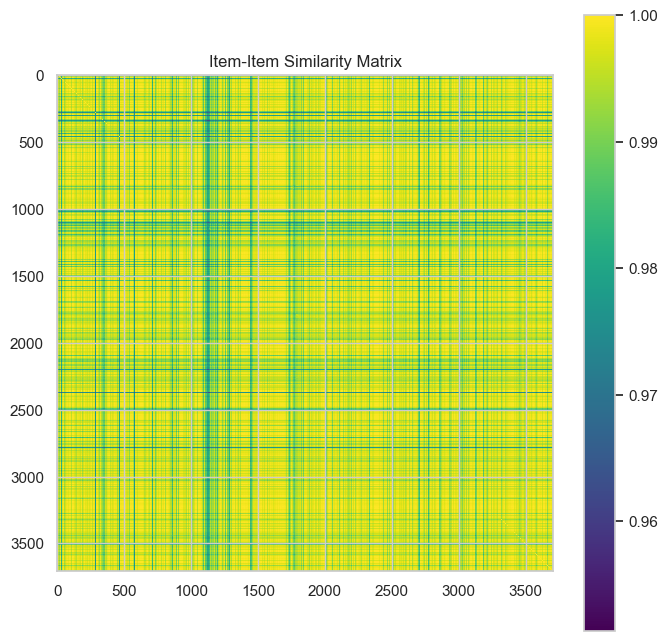

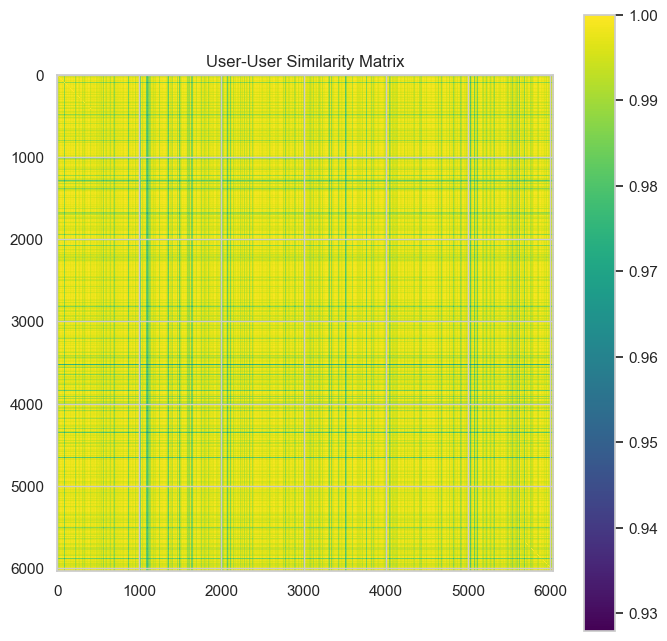

In [272]:
import matplotlib.pyplot as plt

# Function to plot similarity matrix as a square figure
def plot_similarity_matrix(similarity_matrix, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Plot item-item similarity matrix
plot_similarity_matrix(item_similarity_matrix, 'Item-Item Similarity Matrix')

# Plot user-user similarity matrix
plot_similarity_matrix(user_similarity_matrix, 'User-User Similarity Matrix')


In [273]:
from scipy.sparse import csr_matrix

# Convert pivot table to CSR matrix
pivot_table_csr = csr_matrix(pivot_table_filled.values)

# Print the CSR matrix
print("CSR Matrix:")
print(pivot_table_csr)


CSR Matrix:
  (0, 0)	5.0
  (0, 1)	3.2388921779108912
  (0, 2)	3.2388921779108912
  (0, 3)	3.2388921779108912
  (0, 4)	3.2388921779108912
  (0, 5)	3.2388921779108912
  (0, 6)	3.2388921779108912
  (0, 7)	3.2388921779108912
  (0, 8)	3.2388921779108912
  (0, 9)	3.2388921779108912
  (0, 10)	3.2388921779108912
  (0, 11)	3.2388921779108912
  (0, 12)	3.2388921779108912
  (0, 13)	3.2388921779108912
  (0, 14)	3.2388921779108912
  (0, 15)	3.2388921779108912
  (0, 16)	3.2388921779108912
  (0, 17)	3.2388921779108912
  (0, 18)	3.2388921779108912
  (0, 19)	3.2388921779108912
  (0, 20)	3.2388921779108912
  (0, 21)	3.2388921779108912
  (0, 22)	3.2388921779108912
  (0, 23)	3.2388921779108912
  (0, 24)	3.2388921779108912
  :	:
  (6039, 3681)	3.2388921779108912
  (6039, 3682)	3.2388921779108912
  (6039, 3683)	3.2388921779108912
  (6039, 3684)	3.2388921779108912
  (6039, 3685)	3.2388921779108912
  (6039, 3686)	3.2388921779108912
  (6039, 3687)	3.2388921779108912
  (6039, 3688)	3.2388921779108912
  (6039, 3

In [274]:
def get_top_recommendations(item_id, similarity_matrix, pivot_table, num_recommendations=5):
    # Get similarity scores for the given item
    item_similarity_scores = similarity_matrix[item_id]

    # Get indices of similar items, excluding the given item itself
    similar_items_indices = item_similarity_scores.argsort()[::-1][1:]

    # Filter out items that the user has already rated
    rated_items = pivot_table.iloc[:, item_id]
    similar_items_indices = [idx for idx in similar_items_indices if rated_items[idx] == 0]

    # Get the top N recommended items
    top_recommendations = similar_items_indices[:num_recommendations]

    return top_recommendations




In [275]:
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Assuming movies_df contains the movie data with columns MovieID, Title, Genres
# Assuming pivot_table_filled contains the pivot table with filled NaN values

# Convert movie titles into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['Title'])

# Train Nearest Neighbors model using cosine similarity
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(tfidf_matrix)

# Take movie name as user input
input_movie_title = input("Enter the movie name: ")

# Transform user input into TF-IDF vector
input_movie_tfidf = tfidf_vectorizer.transform([input_movie_title])

# Find 5 most similar movies using KNN
_, indices = knn_model.kneighbors(input_movie_tfidf, n_neighbors=6)

# Exclude the first result which will be the user input movie itself
indices = indices.flatten()[1:]

# Get the titles of similar movies
similar_movies = movies_df.iloc[indices]['Title']

# Print the recommended similar movies
print("Recommended similar movies for", input_movie_title, ":")
for idx, movie_title in enumerate(similar_movies, start=1):
    print(idx, ".", movie_title)


Enter the movie name: 
Recommended similar movies for  :
1 . Thing From Another World, The (1951)
2 . Tarantula (1955)
3 . It Came from Hollywood (1982)
4 . Wolf Man, The (1941)
5 . Rocky Horror Picture Show, The (1975)


In [276]:
from sklearn.model_selection import train_test_split

# Assume df is your DataFrame containing UserID, MovieID, and Rating columns
# Split the data into train and test sets
train_data, test_data = train_test_split(merged_df, test_size=0.2, random_state=42)

# Optionally, you can convert the train and test data into sparse matrices
# based on the user-item interaction matrix representation required by the model
train_data, test_data

(        MovieID                               Title                  Genres  \
 416292     1291  Indiana Jones and the Last Crusade        Action|Adventure   
 683230     2692           Run Lola Run (Lola rennt)    Action|Crime|Romance   
 2434       1244                           Manhattan    Comedy|Drama|Romance   
 688533     2571                         Matrix, The  Action|Sci-Fi|Thriller   
 472584     2921                 High Plains Drifter                 Western   
 ...         ...                                 ...                     ...   
 259178     3397             Great Muppet Caper, The       Children's|Comedy   
 365838     1291  Indiana Jones and the Last Crusade        Action|Adventure   
 131932      360                      I Love Trouble           Action|Comedy   
 671155     1222                   Full Metal Jacket        Action|Drama|War   
 121958     1172                     Cinema Paradiso    Comedy|Drama|Romance   
 
         UserID  Rating  Timestamp Gen

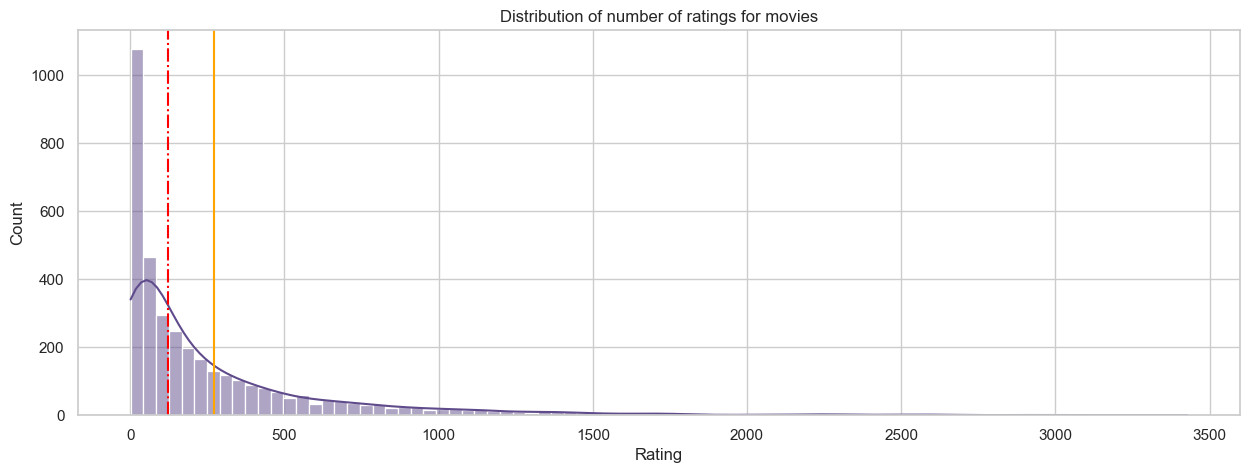

In [277]:

import seaborn as sns
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
sns.histplot(merged_df.groupby('Title')['Rating'].count(),kde=True,ax=ax,color='#5F4B8B')
ax.axvline(merged_df.groupby('Title')['Rating'].count().mean(), color='orange', linestyle='-',linewidth=1.5)
ax.axvline(merged_df.groupby('Title')['Rating'].count().median(), color='red', linestyle='-.',linewidth=1.5)
ax.set_title("Distribution of number of ratings for movies")
plt.show()

# Questionnaire:

Users of which age group have watched and rated the most number of movies? Ans -> 25-34 age group

Users belonging to which profession have watched and rated the most movies? Ans -> college/grad student

Most of the users in our dataset who’ve rated the movies are Male. (T/F) Ans -> True (Male are most- 751,679)

Most of the movies present on our dataset were released in which decade?

70s b. 90s c. 50s d.80s Ans -> 90s
The movie with maximum no. of ratings is ___. Ans ->American Beauty

Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach. Ans ->

Mrs. Doubtfire with a distance of 0.443
Ace Ventura: Pet Detective with a distance of 0.483
Dumb & Dumber with a distance of 0.487
On the basis of approach, Collaborative Filtering methods can be classified into memory-based and model-based. -> Memory based colab filtering has user-user and item-item whereas, model-based has Matrix Factorization

Pearson Correlation ranges between -1 to +1 whereas, Cosine Similarity belongs to the interval between 0 to 1

Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model. Ans ->

RMSE -87.17%
MAPE -> 27 %
Give the sparse ‘row’ matrix representation for the following dense matrix -
[[1 0] [3 7]]

Ans - CSR can be represented as

(0,0)1
(0,1)0
(1,0)3
(1,1)7